#EN2550: Assignment 03 on Object Counting on a Conveyor Belt

##Connected Component Analysis

In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

1. Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

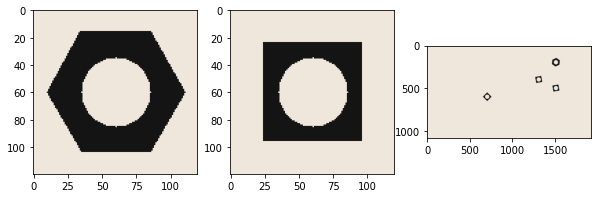

In [39]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread(r'Files/hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread(r'Files/squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread(r'Files/conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(10,10))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

1. Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

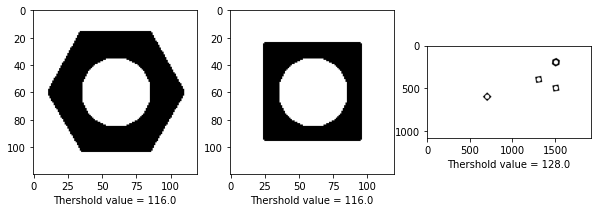

In [43]:
image_lst=[hexnut_template,squarenut_template,conveyor_f100]
thershold_lst=[0,0,0]
hexnut_template = cv.imread(r'Files/hexnut_template.png', cv.IMREAD_GRAYSCALE)
squarenut_template =  cv.imread(r'Files/squarenut_template.png', cv.IMREAD_GRAYSCALE)
conveyor_f100 =  cv.imread(r'Files/conveyor_f100.png', cv.IMREAD_GRAYSCALE)

for i in range(len(image_lst)):
    blur=cv.GaussianBlur(image_lst[i],(5,5),0)
    thershold_lst[i],image_lst[i] = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
fig, ax = plt. subplots(1,3,figsize=(10,10))
for i in range(len(image_lst)):
    ax[i].imshow(cv.cvtColor(image_lst[i], cv.COLOR_GRAY2BGR ))
    ax[i].set_xlabel("Thershold value = "+str(thershold_lst[i]))

Carry out morphological closing to remove small holes inside the foreground. Use a 3 × 3kernel.
 See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.

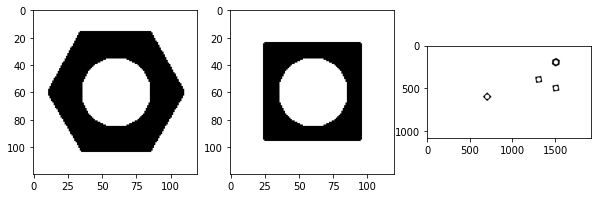

In [44]:
closing_image_lst=image_lst
kernel = np.ones((5,5),np.uint8)
fig, ax = plt. subplots(1,3,figsize=(10,10))
for i in range(len(image_lst)):
    closing_image_lst[i]=cv.morphologyEx(image_lst[i], cv.MORPH_CLOSE, kernel)
    ax[i].imshow(cv.cvtColor(closing_image_lst[i], cv.COLOR_GRAY2BGR ))

Connected components analysis: apply the connectedComponentsWithStats function (see https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as colormapped images. Answer the following questions

How many connected components are detected in each image?

What are the statistics? Interpret these statistics.

What are the centroids?

For the hexnut template, you should get the object area in pixel as approximately 4728.

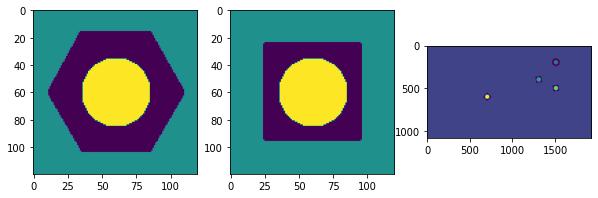

In [45]:
num_of_components_lst = [None]*3
label_lst = [None]*3
statistic_lst = [None]*3
centroid_lst = [None]*3
connectivity = 4 
fig, ax = plt. subplots(1,3,figsize=(10,10))
for i in range(len(image_lst)):
    num_of_components_lst[i],label_lst[i],statistic_lst[i],centroid_lst[i]=cv.connectedComponentsWithStats(closing_image_lst[i] ,connectivity , cv.CV_32S)
    ax[i].imshow(label_lst[i])
    

How many connected components are detected in each image?

In [46]:
name_lst=["hexnut_template.png" ,"squarenut_template.png ","conveyor_f100.png "]
for i in range(3):
    print("Number of components detected in "+name_lst[i] +" is ",num_of_components_lst[i])

Number of components detected in hexnut_template.png is  3
Number of components detected in squarenut_template.png  is  3
Number of components detected in conveyor_f100.png  is  6


What are the statistics?

In [47]:
for i in range(3):
    print("Statistics of  "+name_lst[i] +" is \n")
    print(statistic_lst[i],"\n\n")

Statistics of  hexnut_template.png is 

[[  11   16   99   88 4726]
 [   0    0  120  120 7717]
 [  36   36   49   49 1957]] 


Statistics of  squarenut_template.png  is 

[[  24   24   72   72 3223]
 [   0    0  120  120 9220]
 [  36   36   49   49 1957]] 


Statistics of  conveyor_f100.png  is 

[[    652     151     894     498   13910]
 [      0       0    1920    1080 2051862]
 [   1476     176      49      49    1957]
 [   1276     376      49      49    1957]
 [   1476     476      49      49    1957]
 [    676     576      49      49    1957]] 




Interpret these statistics.

Statistic array interpret coordinates & area of  each bounding boxes 

What are the centroids?

In [48]:
for i in range(3):
    print("Centroids of components in  "+name_lst[i] +" is \n")
    print(centroid_lst[i],"\n\n")

Centroids of components in  hexnut_template.png is 

[[59.83368599 59.22323318]
 [59.168848   59.54269794]
 [60.         60.        ]] 


Centroids of components in  squarenut_template.png  is 

[[59.19640087 59.19640087]
 [59.5        59.5       ]
 [60.         60.        ]] 


Centroids of components in  conveyor_f100.png  is 

[[1275.2736161   399.88181165]
 [ 956.25102663  540.88332646]
 [1500.          200.        ]
 [1300.          400.        ]
 [1500.          500.        ]
 [ 700.          600.        ]] 




The first row in the statistics array of  hexnut_template.png represents the statistics of hexnut. The fourth column of the statistic array represents areas of the boundary boxes. Therefore, the 1st-row 4th column value represents the area of hexnut. So the hexnut area is 4726 and it is approximately equal to 4728.

1. Contour analysis: Use findContours function to retrieve the extreme outer contours. (see https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html for help and https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0 for information.

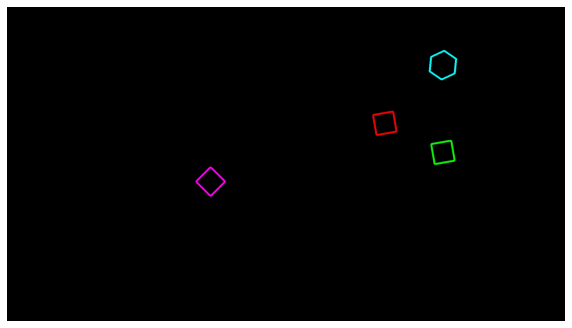

In [79]:
contour_lst = [None]*3
hierarchy_lst = [None]*3
invert_img_lst = [None]*3
color_lst = [(249,4,238),(17,238,15),(231,6,5),(14,247,247)]


black_img = np.zeros((np.shape(image_lst[2])[0],np.shape(image_lst[2])[1] , 1), dtype = "uint8")
black_img = cv.cvtColor(black_img, cv.COLOR_BGR2RGB)

for i in range(len(closing_image_lst)):
    invert_img_lst[i]=cv.bitwise_not(closing_image_lst[i])


for i in range(len(invert_img_lst)):
    contour_lst[i],hierarchy_lst[i]=cv.findContours(invert_img_lst[i], cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    

for i in range(0, len(contour_lst[2])):
    cv.drawContours(black_img, contour_lst[2], i, color_lst[i], 5)
        

fig, ax = plt.subplots(figsize = (10, 10))
ax.axis("off")
ax.imshow(black_img)

In this section, we will use the synthetic conveyor.mp4 sequence to count the two types of nuts.

1.Open the sequence and play it using the code below.

In [81]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture(r'Files/conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


Count the number of matching hexagonal nuts in conveyor_f100.png. You can use matchCountours function as shown in https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html to match contours in each frame with that in th template